# Gaussian Discriminant Analysis

Author: Sahngyoon Rhee

When given a supervised classification task, one can employ machine learning models such as the softmax regression and KNN to find out $P(Y | X)$ directly. These approaches of solving for $P(Y | X)$ directly is an example **Discriminative Analysis**, which is any algorithm that seeks to label the categorical target variables directly from a space of inputs $\mathcal{X}$. In this notebook, we explore another way of solving the supervised classification task, known as **Generative Analysis**.

Suppose we are given a random variable $X$ and the target variable $y$ which is categorical, also called label. Our goal is to build a model that can predict which points (seen or unseen) belongs to which target category.


Generative Discriminant Analysis models the joint probability distribution of the features and labels, $P(X, Y)$. It first estimates the probability of the features given the label, i.e., it computes $P(X | Y)$ and the probability of the label, $P(Y)$. Then, we use Bayes' theorem to compute the posterior probability:

$$P(Y | X) = \frac{P(X | Y) P(Y)}{P(X)} = \frac{P(X | Y) P(Y)}{\displaystyle\sum_y P(X | y) P(y)}.$$

Because the Gaussian distribution is widely used, weexplain and give an example demonstration of how the **Gaussian Discriminant Analysis (GDA)** works.
 The way that GDA works is best explained through an example: sf GDA

Suppose we have a dataset of flowers. GDA would try to understand the distribution of features (like petal length and width) for each type of flower (label). It then uses this understanding to classify new flowers with specific features.

1. **Modeling the Distribution**: GDA models the distribution of features for each class (type of flower) using a Gaussian distribution.
2. **Estimating Parameters**: It estimates the mean and covariance of the features for each class.
3. **Classifying New Samples**: For a new flower, GDA calculates the likelihood of the features given each class and multiplies it by the prior probability of each class. The class with the highest posterior probability is chosen as the predicted class.

By modeling the distribution of features for each class, GDA can effectively classify new samples based on their features.


In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# import the dataset we will use and define feature and target variables
iris = datasets.load_iris()
X = iris.data[:, :2]  # We will use only the first two features for simplicity
y = iris.target

In [3]:
# define the functions necessary for Generative Discriminant Analysis
class GDA:
    def __init__(self):
        self.classes = None
        self.means = {}
        self.covariances = {}
        self.priors = {}
    
    def fit(self, X, y):
        """
        Fit the GDA model to the data.
        
        Parameters:
        X (numpy.ndarray): Feature matrix.
        y (numpy.ndarray): Labels.
        
        This function calculates the means, covariances, and priors for each class.
        """
        self.classes = np.unique(y)
        
        # Calculate means, covariances, and priors for each class
        for c in self.classes:
            X_c = X[y == c]  # Get all samples belonging to class c
            self.means[c] = np.mean(X_c, axis=0)  # Calculate mean of class c
            self.covariances[c] = np.cov(X_c.T)  # Calculate covariance of class c
            self.priors[c] = X_c.shape[0] / X.shape[0]  # Calculate prior of class c
    
    def predict(self, X):
        """
        Predict the class labels for the input data.
        
        Parameters:
        X (numpy.ndarray): Feature matrix.
        
        Returns:
        numpy.ndarray: Predicted class labels.
        
        This function calculates the likelihoods for each class and returns the class with the highest likelihood.
        """
        likelihoods = np.zeros((X.shape[0], len(self.classes)))
        
        # Calculate likelihoods for each class
        for idx, c in enumerate(self.classes):
            mean = self.means[c]  # Mean of class c
            cov = self.covariances[c]  # Covariance of class c
            prior = self.priors[c]  # Prior of class c
            likelihoods[:, idx] = self.multivariate_gaussian(X, mean, cov) * prior  # Calculate likelihood
        
        # Return the class with the highest likelihood
        return np.argmax(likelihoods, axis=1)
    
    def multivariate_gaussian(self, X, mean, cov):
        """
        Calculate the multivariate Gaussian probability density.
        
        Parameters:
        X (numpy.ndarray): Feature matrix.
        mean (numpy.ndarray): Mean vector.
        cov (numpy.ndarray): Covariance matrix.
        
        Returns:
        numpy.ndarray: Probability densities.
        
        This function calculates the probability density of the multivariate Gaussian distribution.
        """
        n = X.shape[1]  # Number of features
        diff = X - mean  # Difference between samples and mean
        # Calculate multivariate Gaussian probability
        return np.exp(-0.5 * np.sum(diff @ np.linalg.inv(cov) * diff, axis=1)) / np.sqrt((2 * np.pi) ** n * np.linalg.det(cov))

# Create GDA object
gda = GDA()
# Fit the model to the data
gda.fit(X, y)

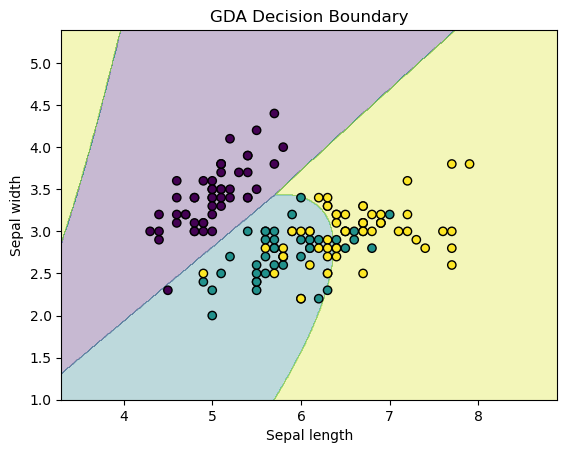

In [4]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('GDA Decision Boundary')
    plt.show()

plot_decision_boundary(gda, X, y)

What we have demonstrated so far is an example of a Quadratic Discriminant Analysis (QDA), which allows the covariance matrices for each categories to be different from one another. The term "quadratic" in its name derives from the fact that, if we allow for the covariance matrices to differ, then the decision boundaries will be at most second degree polynomial (i.e. either quadratic or linear function).

If we assume that all cavriance matrices are equal, which simplifies computations, then the decision boundaries will be linear, resulting in Linear Discriminant Analysis (LDA). Both QDA and LDA are examples of Gaussian Discriminant Analysis (GDA).

In the following, we impliment LDA to the same dataset as above, using the `sklearn` package.

In [5]:
# import necessary package
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
# fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

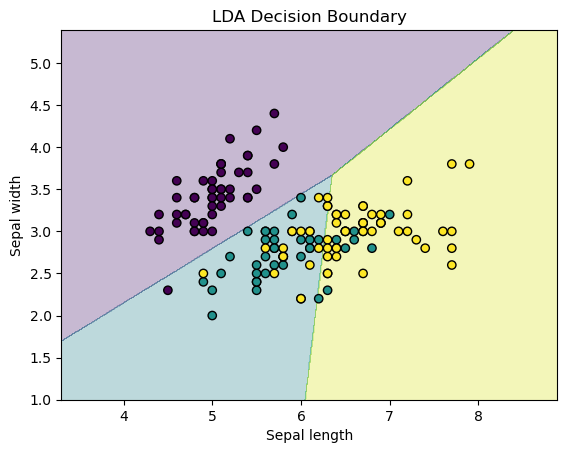

In [7]:
# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('LDA Decision Boundary')
    plt.show()

plot_decision_boundary(lda, X, y)

## Generative Analysis or Discriminative Analysis?

We have explored a particular type of generative analysis, GDA, and you may already know about various discriminative analysis, such as Softmax regerssion, support vector machines, and neural networks. The question arises as to which one is better. Here, we expllore the pros and cons of each, and the cases on which one of the two are better.

### Generative Analysis

Generative models, as a probability model that calculates the joint discribution function $ P(X, Y) $, allows us to generate new data points and handle missing data more effectively. They are also flexible and can be used for a variety of tasks, including classification, density estimation, and data generation.

However, generative models can be computationally expensive and more complex to train. They are also more prone to overfitting, especially with limited data, and may not always be as straightforward for classification tasks compared to discriminative models.

### Discriminative Analysis

Discriminative models focus on learning the decision boundary between classes, making them more efficient for classification tasks. They  They also may achieve higher accuracy in classification tasks because they directly model the conditional probability $P(Y | X)$. They are generally simpler and faster to train compared to generative models.

On the downside, discriminative models are primarily used for classification and regression tasks and are not are not suit tasks like data generation. They may also struggle with missing data since they do not model the entire data distribution and are more limited in the variety of tasks they can perform compared to generative modesl.

### When to Use Each

Generative Models: Use these when you need to model the data distribution, handle missing data, or generate new data points.

Discriminative Models: Use these when you need high accuracy in classification tasks and efficiency.